In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1. Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

# Rename columns
df.rename(columns={'v1':'Target', 'v2':'text'}, inplace=True)

In [5]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###### Encoding the values of Target column


In [6]:
# Encoding the values of Target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Target = le.fit_transform(df.Target)

df.Target.unique()

array([0, 1])

###### Missing values

In [7]:
df.isnull().sum()

Target    0
text      0
dtype: int64

######  Duplicates

In [8]:
# Check duplicates
df.duplicated().sum()

403

In [9]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

# 

# 2. EDA

In [10]:
df.Target.value_counts()

0    4516
1     653
Name: Target, dtype: int64

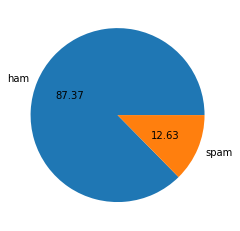

In [11]:
import matplotlib.pyplot as plt
plt.pie(df.Target.value_counts(),
        labels=['ham', 'spam'],
        autopct="%0.2f")
plt.show()

   Data is imbalanced

## 

###### Creating a new column for Number of characters


In [12]:
df['num_characters'] = df['text'].apply(len)         #Note- Apply is used when we want to apply function on every value of column. 
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


###### Creating a new column for Number of words and Number of sentences


In [17]:
import nltk
# nltk.download('punkt')

#Note - nltk.word_tokenize is breaking on the basis of words
# df['text'].apply(lambda x: nltk.word_tokenize(x))                           
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


#Note - nltk.sent_tokenize is breaking on the basis of sentense
# df['text'].apply(lambda x: nltk.sent_tokenize(x))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))     


df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


###### Analysing

In [18]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [19]:
# ham
df[df['Target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# spam
df[df['Target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# 

# 3. Data Preprocessing
: Lower case                                                          
: Tokenization                                                          
: Removing special characters                                                          
: Removing stop words punctuation                                                          
: Stemming

In [21]:
import nltk
# nltk.download()

In [39]:
# Stop words
# nltk.set_proxy('http://proxy.example.com:3128', ('HP'))
# nltk.download()
# from nltk.corpus import stopwords
# stopwords.words('english')

n = ['would','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'furthe', 'was', 'here', 'than']

In [24]:
# Punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

# 

In [45]:
def transform_text(text):
    
    # Lower
    text = text.lower()
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing spacial characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Removing Stop-words and Punctutation marks
    text = y[:]
    y.clear()
    for i in text:
        if i not in string.punctuation and i not in n:
            y.append(i)
    
    # Stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
transform_text("i'll love to watch youtube ' ?? / %")

'love watch youtub'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [58]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 

# 4. Word Cloud

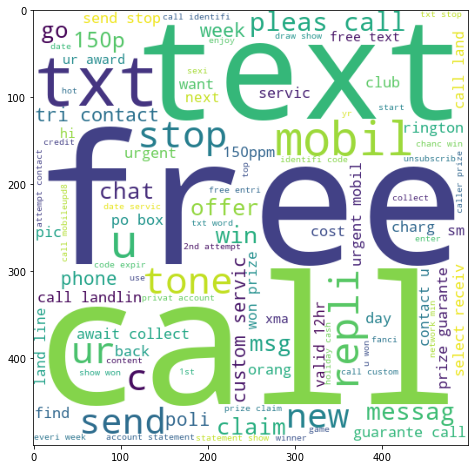

In [69]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(25,8))
plt.imshow(spam_wc)

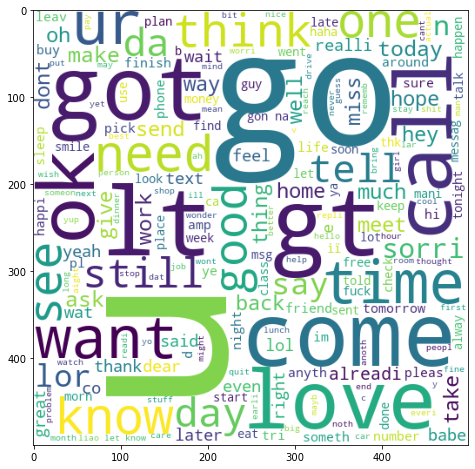

In [70]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(25,8))
plt.imshow(ham_wc)

# 

# 4. Top 30 most occuring words

###### for spam

In [74]:
spam_corpus = []

for msg in df[df['Target']==1]['transformed_text']:
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

10012

2023-04-04 15:38:15,957 [2436] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



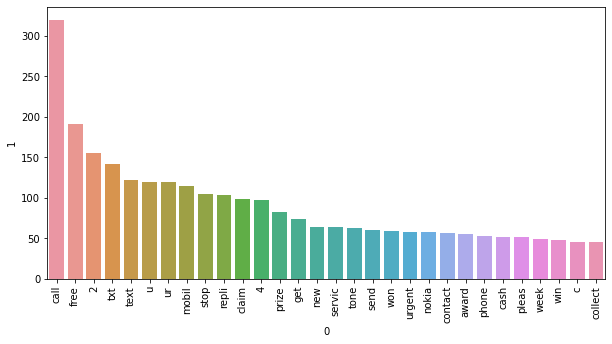

In [86]:
from collections import Counter
# Counter(spam_corpus)                       #This will give you a dict which will have word as keys and it's occurance as values
# Counter(spam_corpus).most_common(30)
# pd.DataFrame(Counter(spam_corpus).most_common(30))



plt.figure(figsize=(10,5))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
           pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

###### for ham

In [87]:
ham_corpus = []

for msg in df[df['Target']==0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35470

2023-04-04 15:41:05,477 [2436] WARNING  py.warnings:109: [JupyterRequire] C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



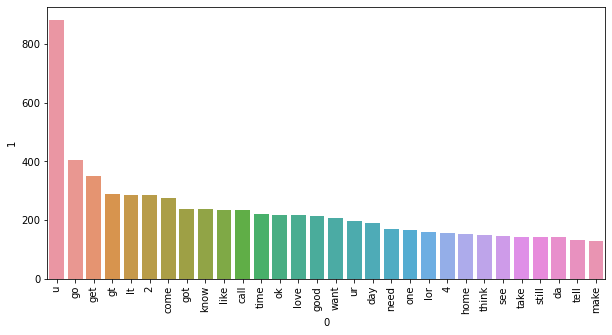

In [88]:
from collections import Counter

plt.figure(figsize=(10,5))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
           pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 

In [93]:
df.to_excel(r"C:\Users\HP\_Machine Learning\Projects\Email Spam\after_eda_spam.xlsx", index=False)